## Final Project Workbook
#### Kelvin Wu, Luke Miller

In [1]:
import pandas as pd
import numpy as np


In [2]:
# read into the downloaded data file, "US_QS_College Rankings.csv"
df_qs = pd.read_csv("US_QS_College Rankings.csv", encoding="ISO-8859-1")
df_qs.head()

,New Ranking,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
2,3,6,5,Stanford University,US,United States,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2,96.1
3,4,10,15,California Institute of Technology (Caltech),US,United States,S,96.5,95.3,100.0,100.0,100.0,79.8,65.5,31.0,62.5,90.9
4,5,11,12,University of Pennsylvania,US,United States,L,96.3,91.9,99.8,74.0,90.9,66.2,91.9,100.0,93.0,90.3


In [3]:
# check the data types of the columns
df_qs.dtypes

New Ranking                         int64
2025 Rank                          object
2024 Rank                          object
Institution Name                   object
Location                           object
Location Full                      object
Size                               object
Academic Reputation               float64
Employer Reputation               float64
Faculty Student                   float64
Citations per Faculty             float64
International Faculty             float64
International Students            float64
International Research Network    float64
Employment Outcomes               float64
Sustainability                    float64
QS Overall Score                   object
dtype: object

In [4]:
df_qs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   New Ranking                     197 non-null    int64  
 1   2025 Rank                       197 non-null    object 
 2   2024 Rank                       197 non-null    object 
 3   Institution Name                197 non-null    object 
 4   Location                        197 non-null    object 
 5   Location Full                   197 non-null    object 
 6   Size                            197 non-null    object 
 7   Academic Reputation             197 non-null    float64
 8   Employer Reputation             197 non-null    float64
 9   Faculty Student                 197 non-null    float64
 10  Citations per Faculty           197 non-null    float64
 11  International Faculty           194 non-null    float64
 12  International Students          195 

In [5]:
# check missing values in the dataframe
df_qs.isnull().sum()

New Ranking                       0
2025 Rank                         0
2024 Rank                         0
Institution Name                  0
Location                          0
Location Full                     0
Size                              0
Academic Reputation               0
Employer Reputation               0
Faculty Student                   0
Citations per Faculty             0
International Faculty             3
International Students            2
International Research Network    0
Employment Outcomes               0
Sustainability                    0
QS Overall Score                  0
dtype: int64

Because the ranking columns contain really messy data that impairs the usability of this information (e.g., many of the colleges have the same "range" as a ranking), we have decided to remove these columns. Also, around a half of the colleges do not have a "QS Overall Score", so we decided to also move that column. 

In [6]:
# Delete the columns: "New Ranking", "2025 Rank", "2024 Rank", "Location", "Location Full", "QS Overall Score"
df_qs.drop(columns=["New Ranking", "2025 Rank", "2024 Rank", "Location", "Location Full", "QS Overall Score"], inplace=True)
# check the data types of the columns again
df_qs.dtypes

Institution Name                   object
Size                               object
Academic Reputation               float64
Employer Reputation               float64
Faculty Student                   float64
Citations per Faculty             float64
International Faculty             float64
International Students            float64
International Research Network    float64
Employment Outcomes               float64
Sustainability                    float64
dtype: object

In [7]:
df_qs

,Institution Name,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability
0,Massachusetts Institute of Technology (MIT),M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0
1,Harvard University,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4
2,Stanford University,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2
3,California Institute of Technology (Caltech),S,96.5,95.3,100.0,100.0,100.0,79.8,65.5,31.0,62.5
4,University of Pennsylvania,L,96.3,91.9,99.8,74.0,90.9,66.2,91.9,100.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...
192,Indiana State University,M,6.2,4.4,8.5,3.0,1.7,2.2,4.2,6.8,1.0
193,Nova Southeastern University,L,2.7,3.5,11.6,2.8,4.7,3.9,13.2,8.9,1.2
194,University of Central Oklahoma,L,5.6,2.9,6.5,1.5,15.9,9.9,5.2,2.9,1.0
195,University of Montana Missoula,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0


### Scrape More College Data from Raptor

In [8]:
import time
import random
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [11]:
# Delay and scroll for human simulation
def random_human_pause(driver, a=1.5, b=3.0):
    time.sleep(random.uniform(a, b))
    driver.execute_script(f"window.scrollBy(0, {random.randint(100, 600)});")

# Setup
options = Options()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
wait = WebDriverWait(driver, 15)

# Load page
driver.get("https://www.collegeraptor.com/college-rankings/details/SchoolRanking")
random_human_pause(driver)

# Step 1: Select 500 from dropdown
try:
    select_element = wait.until(EC.presence_of_element_located((By.ID, "ddlPagesize")))
    driver.execute_script("arguments[0].style.display = 'block';", select_element)  # Reveal hidden dropdown
    select = Select(select_element)
    select.select_by_value("500")
    print("Changed to 500 colleges per page.")
    random_human_pause(driver, 3, 6)

    # Wait for table to refresh after selection
    wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "table#RankingsDetailsDataTable tbody tr")))
except Exception as e:
    print("Dropdown selection failed:", e)

# Step 2: Scrape data
all_data = []
rows = driver.find_elements(By.CSS_SELECTOR, "table#RankingsDetailsDataTable tbody tr")

for row in rows:
    try:
        school_name = row.find_element(By.CSS_SELECTOR, "td:nth-child(2) a").text.strip()
        rank = row.find_element(By.CSS_SELECTOR, "td:nth-child(3)").text.strip()
        prior_rank = row.find_element(By.CSS_SELECTOR, "td:nth-child(4)").text.strip()
        scaled_score = row.find_element(By.CSS_SELECTOR, "td:nth-child(5)").text.strip()
        prior_scaled_score = row.find_element(By.CSS_SELECTOR, "td:nth-child(6)").text.strip()

        all_data.append({
            "Rank": rank,
            "School Name": school_name,
            "Prior Rank": prior_rank,
            "Scaled Score": scaled_score,
            "Prior Scaled Score": prior_scaled_score
        })
        print(f"{school_name} is scraped!")
    except Exception:
        continue

# Finalize
driver.quit()
df = pd.DataFrame(all_data)
df.to_csv("college_rankings_raptor.csv", index=False)
print(f"Scraped {len(df)} colleges. Saved to 'college_rankings_raptor.csv'.")

Changed to 500 colleges per page.
Princeton University is scraped!
Harvard University is scraped!
Massachusetts Institute of Technology is scraped!
University of Chicago is scraped!
Yale University is scraped!
University of Pennsylvania is scraped!
Stanford University is scraped!
Columbia University in the City of New York is scraped!
California Institute of Technology is scraped!
Duke University is scraped!
Dartmouth College is scraped!
Northwestern University is scraped!
Brown University is scraped!
Rice University is scraped!
University of Notre Dame is scraped!
Vanderbilt University is scraped!
Cornell University is scraped!
Washington University in St Louis is scraped!
Washington and Lee University is scraped!
Williams College is scraped!
Johns Hopkins University is scraped!
Bowdoin College is scraped!
Swarthmore College is scraped!
Pomona College is scraped!
Claremont McKenna College is scraped!
Carnegie Mellon University is scraped!
University of Virginia-Main Campus is scraped!

In [9]:
# load the scraped data
df_raptor = pd.read_csv("college_rankings_raptor.csv")
df_raptor.head(20)

,Rank,School Name,Prior Rank,Scaled Score,Prior Scaled Score
0,1,Princeton University,1,100.0,100.0
1,2,Harvard University,3,96.9\n(1.2%),95.8
2,3,Massachusetts Institute of Technology,2,96.3\n(0.7%),97.0
3,4,University of Chicago,5,93.7\n(0.5%),93.2
4,5,Yale University,4,92.3\n(3.2%),95.3
5,6,University of Pennsylvania,7,91.6\n(0.8%),90.9
6,7,Stanford University,6,91.6\n(1.1%),92.7
7,8,Columbia University in the City of New York,9,90.4\n(0.3%),90.7
8,9,California Institute of Technology,8,90.1\n(0.7%),90.8
9,10,Duke University,12,89.4\n(0.6%),89.9


In [10]:
# Clean the Scaled Score column, removing any unwanted characters
df_raptor.loc[1:, 'Scaled Score'] = df_raptor.loc[1:, 'Scaled Score'].str.split('\n').str[0].str.strip()


In [11]:
# check the dataframe again
df_raptor

,Rank,School Name,Prior Rank,Scaled Score,Prior Scaled Score
0,1,Princeton University,1,100.0,100.0
1,2,Harvard University,3,96.9,95.8
2,3,Massachusetts Institute of Technology,2,96.3,97.0
3,4,University of Chicago,5,93.7,93.2
4,5,Yale University,4,92.3,95.3
...,...,...,...,...,...
495,496,Salisbury University,440,56.5,57.0
496,497,Whittier College,334,56.4,60.9
497,498,Pacific University,422,56.4,57.7
498,499,New College of Florida,383,56.4,59.0


In [12]:
# check the data types of the columns
df_raptor.dtypes

Rank                    int64
School Name            object
Prior Rank             object
Scaled Score           object
Prior Scaled Score    float64
dtype: object

In [13]:
# convert Rank, Prior Rank, Scaled Score, and Prior Scaled Score to numeric types
df_raptor['Rank'] = pd.to_numeric(df_raptor['Rank'], errors='coerce')
df_raptor['Prior Rank'] = pd.to_numeric(df_raptor['Prior Rank'], errors='coerce')
df_raptor['Scaled Score'] = pd.to_numeric(df_raptor['Scaled Score'], errors='coerce')
df_raptor['Prior Scaled Score'] = pd.to_numeric(df_raptor['Prior Scaled Score'], errors='coerce')

In [14]:
# check the data types of the columns
df_raptor.dtypes

Rank                    int64
School Name            object
Prior Rank            float64
Scaled Score          float64
Prior Scaled Score    float64
dtype: object

In [15]:
# check missing values in the dataframe
df_raptor.isnull().sum()

Rank                  0
School Name           0
Prior Rank            3
Scaled Score          0
Prior Scaled Score    2
dtype: int64

In [16]:
# delete the rows with missing values
df_raptor.dropna(inplace=True)

In [17]:
# check missing values in the dataframe
df_raptor.isnull().sum()

Rank                  0
School Name           0
Prior Rank            0
Scaled Score          0
Prior Scaled Score    0
dtype: int64

### Now we need to standardize the college names, preparing for a merge

In [18]:
# Normalize case and whitespace in the School Name column
df_qs['Institution Name_clean'] = df_qs['Institution Name'].str.lower().str.strip()
df_raptor['School Name_clean'] = df_raptor['School Name'].str.lower().str.strip()


In [19]:
# Remove common variants and punctuation
import re

def clean_name(name):
    name = name.lower()
    name = re.sub(r'\(.*?\)', '', name)  # remove text in parentheses
    name = re.sub(r'[^a-z0-9\s]', '', name)  # remove punctuation
    name = re.sub(r'\bthe\b', '', name)  # remove 'the'
    name = re.sub(r'\s+', ' ', name)  # collapse multiple spaces
    return name.strip()

df_qs['Institution Name_clean'] = df_qs['Institution Name'].apply(clean_name)
df_raptor['School Name_clean'] = df_raptor['School Name'].apply(clean_name)

In [20]:
pip install fuzzywuzzy

In [21]:
pip install rapidfuzz

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 21.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from rapidfuzz import process  # much faster than fuzzywuzzy

qs_names = df_qs['Institution Name_clean'].unique()
raptor_names = df_raptor['School Name_clean'].unique()

# Only keep matches with high score
matches = {}
for name in qs_names:
    match, score, _ = process.extractOne(name, raptor_names)
    if score >= 90:  # Accept only strong matches
        matches[name] = match

In [23]:
# New column with corrected matching
df_qs['Institution Name_matched'] = df_qs['Institution Name_clean'].map(matches)


In [24]:
# Drop rows where no match was found (Institution Name_matched = NaN)
df_qs_matched = df_qs.dropna(subset=['Institution Name_matched'])


In [25]:
# Final merge
final_merged = pd.merge(
    df_qs_matched,
    df_raptor,
    left_on='Institution Name_matched',
    right_on='School Name_clean',
    how='inner'
)

print(f"Number of matched colleges: {final_merged.shape[0]}")


Number of matched colleges: 145


In [26]:
final_merged

,Institution Name,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Institution Name_clean,Institution Name_matched,Rank,School Name,Prior Rank,Scaled Score,Prior Scaled Score,School Name_clean
0,Massachusetts Institute of Technology (MIT),M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,massachusetts institute of technology,massachusetts institute of technology,3,Massachusetts Institute of Technology,2.0,96.3,97.0,massachusetts institute of technology
1,Harvard University,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,harvard university,harvard university,2,Harvard University,3.0,96.9,95.8,harvard university
2,Stanford University,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2,stanford university,stanford university,7,Stanford University,6.0,91.6,92.7,stanford university
3,California Institute of Technology (Caltech),S,96.5,95.3,100.0,100.0,100.0,79.8,65.5,31.0,62.5,california institute of technology,california institute of technology,9,California Institute of Technology,8.0,90.1,90.8,california institute of technology
4,University of Pennsylvania,L,96.3,91.9,99.8,74.0,90.9,66.2,91.9,100.0,93.0,university of pennsylvania,university of pennsylvania,6,University of Pennsylvania,7.0,91.6,90.9,university of pennsylvania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,University of San Francisco,M,5.9,4.4,18.7,3.6,2.3,20.2,6.0,29.5,1.2,university of san francisco,university of san francisco,231,University of San Francisco,197.0,65.7,67.5,university of san francisco
141,University of South Alabama (USA),M,4.7,5.9,19.0,6.1,NaN,2.1,13.6,2.3,1.2,university of south alabama,university of south,141,The University of the South,125.0,71.8,73.3,university of south
142,University of the Pacific,M,2.2,3.5,31.9,3.0,3.2,12.0,7.6,8.1,1.0,university of pacific,university of pacific,304,University of the Pacific,368.0,62.6,59.4,university of pacific
143,Illinois State University,L,3.4,2.8,5.6,4.1,4.7,3.1,20.0,7.6,1.1,illinois state university,illinois state university,482,Illinois State University,459.0,56.7,56.0,illinois state university


In [27]:
final_merged.to_csv('merged_college_rankings_clean.csv', index=False)


In [28]:
# load the merged data
merged_df = pd.read_csv('merged_college_rankings_clean.csv')
# check the data types of the columns
merged_df.dtypes
# check missing values in the dataframe
merged_df.isnull().sum()
# check the first few rows of the merged dataframe
merged_df.head()

,Institution Name,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Institution Name_clean,Institution Name_matched,Rank,School Name,Prior Rank,Scaled Score,Prior Scaled Score,School Name_clean
0,Massachusetts Institute of Technology (MIT),M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,massachusetts institute of technology,massachusetts institute of technology,3,Massachusetts Institute of Technology,2.0,96.3,97.0,massachusetts institute of technology
1,Harvard University,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,harvard university,harvard university,2,Harvard University,3.0,96.9,95.8,harvard university
2,Stanford University,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2,stanford university,stanford university,7,Stanford University,6.0,91.6,92.7,stanford university
3,California Institute of Technology (Caltech),S,96.5,95.3,100.0,100.0,100.0,79.8,65.5,31.0,62.5,california institute of technology,california institute of technology,9,California Institute of Technology,8.0,90.1,90.8,california institute of technology
4,University of Pennsylvania,L,96.3,91.9,99.8,74.0,90.9,66.2,91.9,100.0,93.0,university of pennsylvania,university of pennsylvania,6,University of Pennsylvania,7.0,91.6,90.9,university of pennsylvania


In [29]:
# Drop unnecessary name columns
final_merged2 = merged_df.drop(columns=['Institution Name', 'Institution Name_clean', 'Institution Name_matched', 'School Name_clean'])


In [30]:
# move the column "School Name" to the first position
final_merged2 = final_merged2[['School Name'] + [col for col in final_merged2.columns if col != 'School Name']]
# check the first few rows of the final merged dataframe
final_merged2.head()

,School Name,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,Rank,Prior Rank,Scaled Score,Prior Scaled Score
0,Massachusetts Institute of Technology,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,3,2.0,96.3,97.0
1,Harvard University,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,2,3.0,96.9,95.8
2,Stanford University,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2,7,6.0,91.6,92.7
3,California Institute of Technology,S,96.5,95.3,100.0,100.0,100.0,79.8,65.5,31.0,62.5,9,8.0,90.1,90.8
4,University of Pennsylvania,L,96.3,91.9,99.8,74.0,90.9,66.2,91.9,100.0,93.0,6,7.0,91.6,90.9


In [31]:
# save the final merged dataframe to a CSV file
final_merged2.to_csv('analysis_ready_final_merged_college_rankings.csv', index=False)

In [32]:
# load the anaysis ready final merged data
final_merged3 = pd.read_csv('analysis_ready_final_merged_college_rankings.csv')

### Now is the time to do some analyses

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#### Univariate Analysis -------------------------------------------------------------------

Analysis of Faculty-to-Student ratio: Visualization of the Distribution of Faculty-Student Ratio

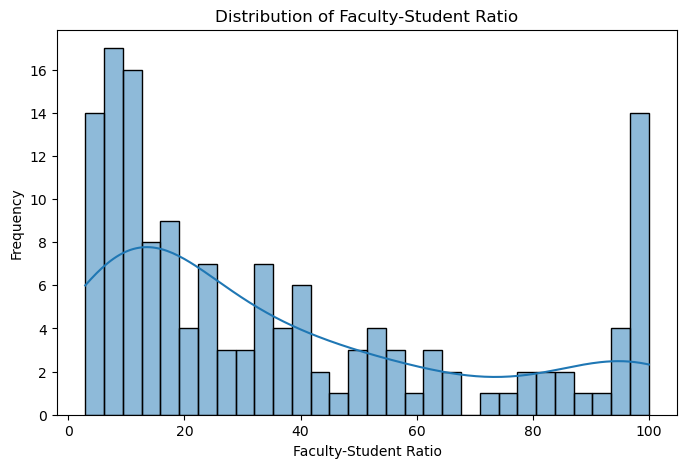

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(final_merged3['Faculty Student'].dropna(),kde=True, bins=30)
plt.title('Distribution of Faculty-Student Ratio')
plt.xlabel('Faculty-Student Ratio')
plt.ylabel('Frequency')
plt.show()

In [35]:
from scipy.stats import shapiro

# Test normality
stat, p_value = shapiro(final_merged3['Faculty Student'].dropna())

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: Data is NOT normally distributed (reject H₀)")
else:
    print("Conclusion: Data appears normally distributed (fail to reject H₀)")


Shapiro-Wilk Test Statistic: 0.8420
P-value: 0.0000
Conclusion: Data is NOT normally distributed (reject H₀)


Analysis of Faculty-to-Student ratio: Descriptive Statistics

count    145.000000
mean      36.792414
std       31.931835
min        2.900000
25%       10.000000
50%       23.500000
75%       55.800000
max      100.000000
Name: Faculty Student, dtype: float64


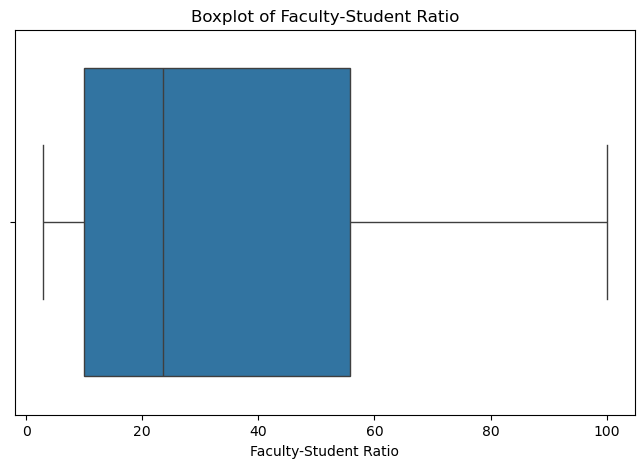

In [36]:
print(final_merged3['Faculty Student'].describe())
# Check for outliers in Faculty-Student Ratio
plt.figure(figsize=(8,5))
sns.boxplot(x=final_merged3['Faculty Student'].dropna())
plt.title('Boxplot of Faculty-Student Ratio')
plt.xlabel('Faculty-Student Ratio')
plt.show()

#### Bivariate Analysis -------------------------------------------------------------------

Relationship between Faculty-to-Student Ratio and Employer Reputation

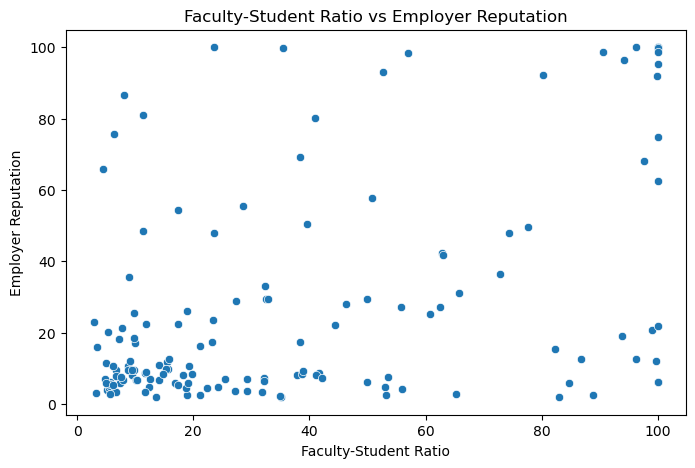

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=final_merged3, x='Faculty Student', y='Employer Reputation')
plt.title('Faculty-Student Ratio vs Employer Reputation')
plt.xlabel('Faculty-Student Ratio')
plt.ylabel('Employer Reputation')
plt.show()

#### Hypothesis Test -------------------------------------------------------------------

Test correlation between "Faculty Student" and "Employer Reputation" 

In [38]:
# drop rows with NaN values in the relevant columns for correlation analysis
faculty_student = final_merged3['Faculty Student'].dropna()
employer_reputation = final_merged3['Employer Reputation'].dropna()

In [39]:
# Remove NA on both sides to ensure equal lengths
common_indices = faculty_student.index.intersection(employer_reputation.index)

In [40]:
# correlation analysis
corr, p_value = pearsonr(faculty_student.loc[common_indices], employer_reputation.loc[common_indices])
print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of correlation
if p_value < 0.05:
    if abs(corr) > 0.5:
        print("There is a strong correlation between Faculty-Student Ratio and Employer Reputation.")
    elif abs(corr) > 0.3:
        print("There is a moderate correlation between Faculty-Student Ratio and Employer Reputation.")
    else:
        print("There is a weak correlation between Faculty-Student Ratio and Employer Reputation.")
else:
    print("There is no statistically significant correlation between Faculty-Student Ratio and Employer Reputation.")

Pearson correlation coefficient: 0.4567
P-value: 0.0000
There is a moderate correlation between Faculty-Student Ratio and Employer Reputation.


#### Heat Map -------------------------------------------------------------------

In [41]:
# Select important numerical columns
selected_cols = [
    'Academic Reputation', 'Employer Reputation', 'Faculty Student',
    'Citations per Faculty', 'International Students', 'Sustainability'
]

In [42]:
# Create correlation matrix
correlation_matrix = final_merged3[selected_cols].corr()

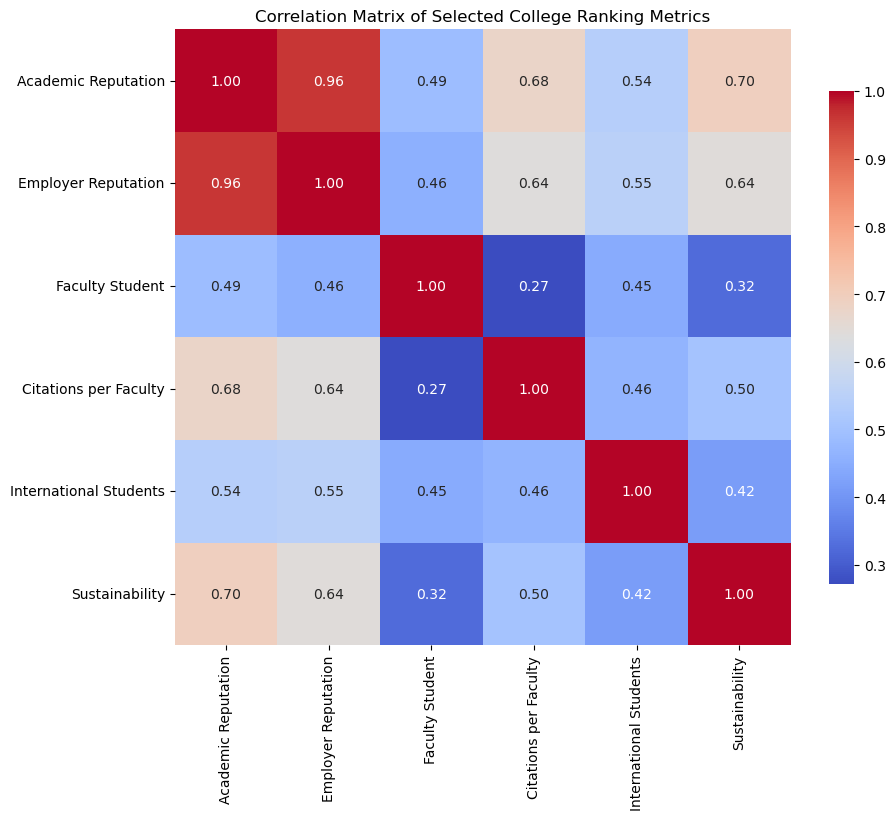

In [43]:
# Heatmap!
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Selected College Ranking Metrics')
plt.show()

#### Machine Learning -------------------------------------------------------------------

In [44]:
# Predict employer reputation based on Faculty Student, Citations per Faculty, International Students
X = final_merged3[['Faculty Student', 'Citations per Faculty', 'International Students']].dropna()
y = final_merged3.loc[X.index, 'Employer Reputation']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.4364


In [45]:
# show model coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)

                  Feature  Coefficient
0         Faculty Student     0.188844
1   Citations per Faculty     0.524272
2  International Students     0.188912


#### Now Let's Look at Some Other Features

Academic Reputation (QS) vs Scaled Score (Raptor)

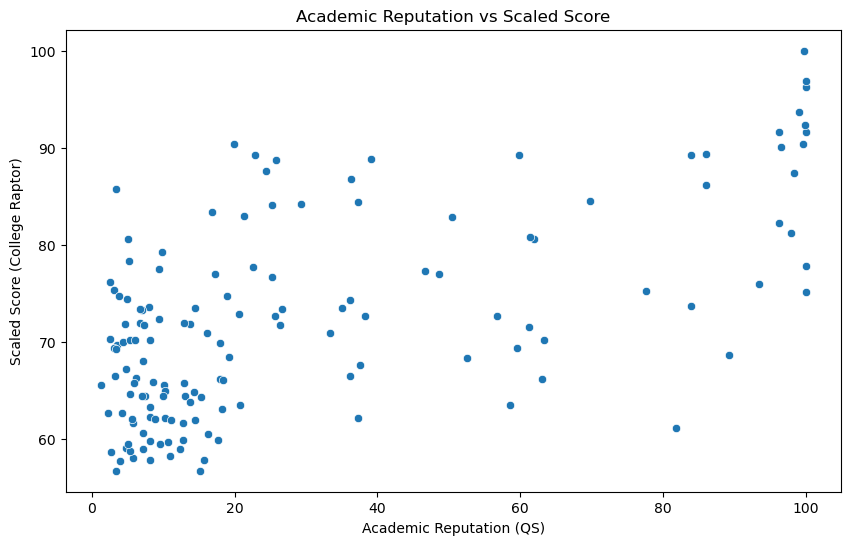

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged3, x='Academic Reputation', y='Scaled Score')
plt.title('Academic Reputation vs Scaled Score')
plt.xlabel('Academic Reputation (QS)')
plt.ylabel('Scaled Score (College Raptor)')
plt.show()

In [47]:
# Pearson correlation for Academic Reputation and Scaled Score
x = final_merged3['Academic Reputation'].dropna()
y = final_merged3['Scaled Score'].dropna()
# Remove NA on both sides to ensure equal lengths
common_indices = x.index.intersection(y.index)
corr, p_value = pearsonr(x.loc[common_indices], y.loc[common_indices])
print(f"Pearson correlation coefficient between Academic Reputation and Scaled Score: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
# Interpretation of correlation
if p_value < 0.05:
    if abs(corr) > 0.5:
        print("There is a strong correlation between Academic Reputation and Scaled Score.")
    elif abs(corr) > 0.3:
        print("There is a moderate correlation between Academic Reputation and Scaled Score.")
    else:
        print("There is a weak correlation between Academic Reputation and Scaled Score.")
else:
    print("There is no statistically significant correlation between Academic Reputation and Scaled Score.")

Pearson correlation coefficient between Academic Reputation and Scaled Score: 0.6236
P-value: 0.0000
There is a strong correlation between Academic Reputation and Scaled Score.


Sustainability (QS) vs Rank (Raptor)

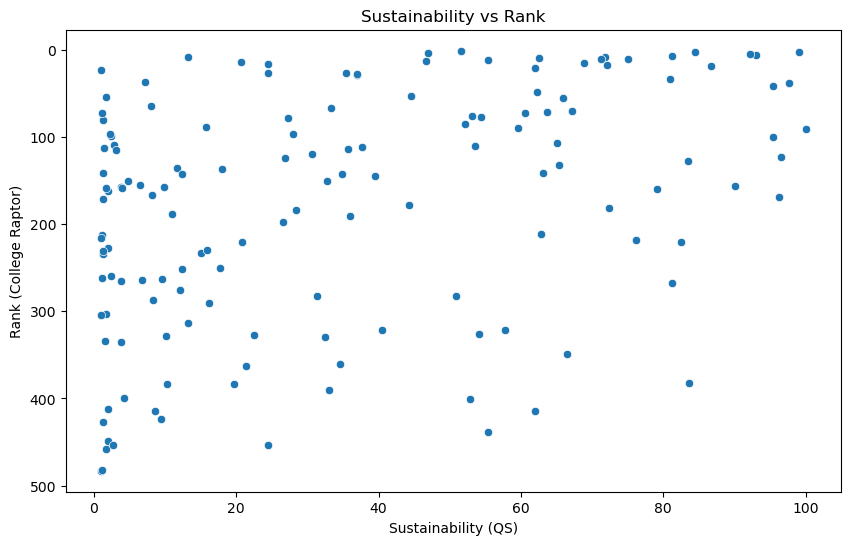

Pearson correlation coefficient between Sustainability and Rank: -0.3895
P-value: 0.0000
There is a moderate correlation between Sustainability and Rank.


In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged3, x='Sustainability', y='Rank')
plt.title('Sustainability vs Rank')
plt.xlabel('Sustainability (QS)')
plt.ylabel('Rank (College Raptor)')
plt.gca().invert_yaxis()  # Invert y-axis for ranking (lower is better)
plt.show()

# Pearson correlation for Sustainability and Rank
x = final_merged3['Sustainability'].dropna()
y = final_merged3['Rank'].dropna()
# Remove NA on both sides to ensure equal lengths
common_indices = x.index.intersection(y.index)
corr, p_value = pearsonr(x.loc[common_indices], y.loc[common_indices])
print(f"Pearson correlation coefficient between Sustainability and Rank: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
# Interpretation of correlation
if p_value < 0.05:
    if abs(corr) > 0.5:
        print("There is a strong correlation between Sustainability and Rank.")
    elif abs(corr) > 0.3:
        print("There is a moderate correlation between Sustainability and Rank.")
    else:
        print("There is a weak correlation between Sustainability and Rank.")
else:
    print("There is no statistically significant correlation between Sustainability and Rank.")

Employer Reputation (QS) vs Rank Change (Raptor)

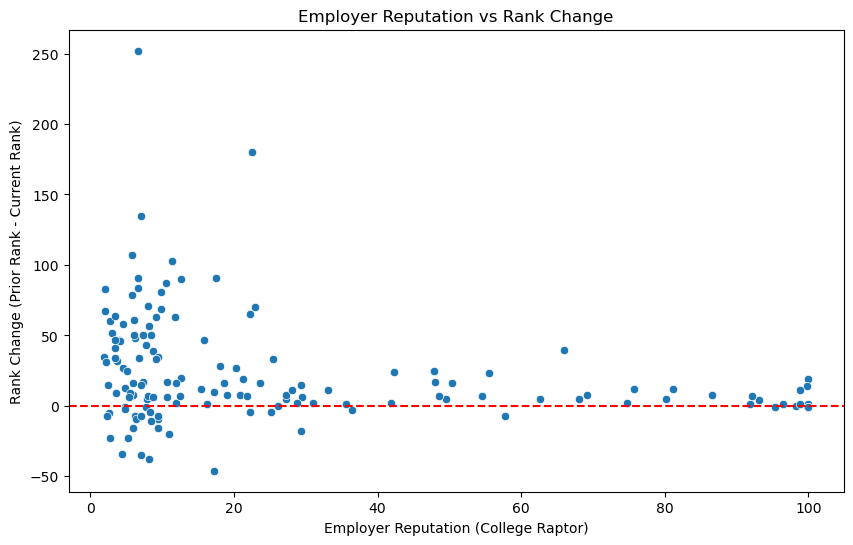

Pearson correlation coefficient between Employer Reputation and Rank Change: -0.2462
P-value: 0.0028
There is a weak correlation between Employer Reputation and Rank Change.


In [49]:
final_merged3['Rank Change'] = final_merged3['Prior Rank'] - final_merged3['Rank']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged3, x='Employer Reputation', y='Rank Change')
plt.title('Employer Reputation vs Rank Change')
plt.xlabel('Employer Reputation (College Raptor)')
plt.ylabel('Rank Change (Prior Rank - Current Rank)')
plt.axhline(0, color='red', linestyle='--')
plt.show()
# Pearson correlation for Employer Reputation and Rank Change
x = final_merged3['Employer Reputation'].dropna()
y = final_merged3['Rank Change'].dropna()
# Remove NA on both sides to ensure equal lengths
common_indices = x.index.intersection(y.index)
corr, p_value = pearsonr(x.loc[common_indices], y.loc[common_indices])
print(f"Pearson correlation coefficient between Employer Reputation and Rank Change: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
# Interpretation of correlation
if p_value < 0.05:
    if abs(corr) > 0.5:
        print("There is a strong correlation between Employer Reputation and Rank Change.")
    elif abs(corr) > 0.3:
        print("There is a moderate correlation between Employer Reputation and Rank Change.")
    else:
        print("There is a weak correlation between Employer Reputation and Rank Change.")
else:
    print("There is no statistically significant correlation between Employer Reputation and Rank Change.")

International Students (QS) vs Scaled Score (Raptor)

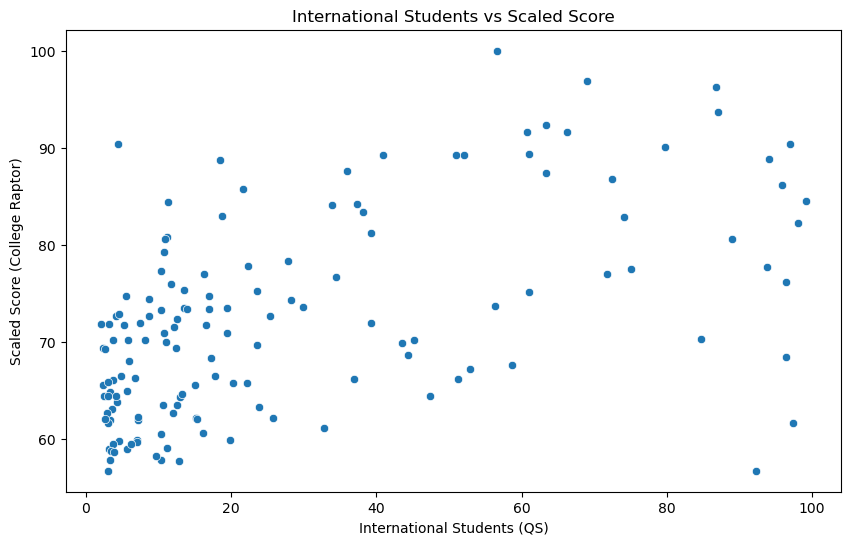

Pearson correlation coefficient between International Students and Scaled Score: 0.5455
P-value: 0.0000
There is a strong correlation between International Students and Scaled Score.


In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged3, x='International Students', y='Scaled Score')
plt.title('International Students vs Scaled Score')
plt.xlabel('International Students (QS)')
plt.ylabel('Scaled Score (College Raptor)')
plt.show()

# Pearson correlation for International Students and Scaled Score
x = final_merged3['International Students'].dropna()
y = final_merged3['Scaled Score'].dropna()

# Remove NA on both sides to ensure equal lengths
common_indices = x.index.intersection(y.index)
corr, p_value = pearsonr(x.loc[common_indices], y.loc[common_indices])
print(f"Pearson correlation coefficient between International Students and Scaled Score: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of correlation
if p_value < 0.05:
    if abs(corr) > 0.5:
        print("There is a strong correlation between International Students and Scaled Score.")
    elif abs(corr) > 0.3:
        print("There is a moderate correlation between International Students and Scaled Score.")
    else:
        print("There is a weak correlation between International Students and Scaled Score.")
else:
    print("There is no statistically significant correlation between International Students and Scaled Score.")

#### Machine Learning 1
    Based on 
        - Academic Reputation (QS)
        - Sustainability (QS)
        - International Students % (QS)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [52]:
features2 = ['Academic Reputation', 'Sustainability', 'International Students']
target2 = 'Scaled Score'

# drop rows with missing values in the relevant columns for regression analysis
md_df = final_merged3[features2 + [target2]].dropna()

In [53]:
x = md_df[features2]
y = md_df[target2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Create and fit the model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Make predictions
y_pred2 = model2.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# show model coefficients
coef_df2 = pd.DataFrame({
    'Feature': features2,
    'Coefficient': model2.coef_
})

print("\nModel Coefficients:")
print(coef_df2)

R-squared: 0.5636
Mean Squared Error: 38.6877

Model Coefficients:
                  Feature  Coefficient
0     Academic Reputation     0.154940
1          Sustainability     0.006541
2  International Students     0.091720


To explore the relationships between college characteristics and institutional rankings, we built a simple linear regression model predicting a college’s Scaled Score (from College Raptor) based on three features sourced from the merged QS and Raptor datasets: Academic Reputation, Sustainability, and International Students Percentage.

The model achieved an R-squared value of 0.56, meaning that approximately 56% of the variation in Scaled Scores across colleges can be explained by these three features. The Mean Squared Error was 38.69, indicating moderate average prediction errors.

Examining the model coefficients, Academic Reputation had the strongest positive influence on the predicted Scaled Score (coefficient = 0.155), followed by International Students Percentage (coefficient = 0.092). Sustainability had a very small positive effect (coefficient = 0.007), suggesting it may be less critical for predicting overall ranking compared to reputation-related variables.

Overall, the results suggest that colleges with stronger academic reputations and higher proportions of international students tend to achieve better scaled scores in general rankings. Sustainability initiatives appear to have a much smaller direct relationship with overall institutional rankings in this dataset.

#### Machine Learning 2
    Based on 
        - Academic Reputation
        - International Students
        - Sustainability

Visualization of the Clusters => What kinds of colleges fall into each cluster? 

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Choose features for clustering
features = ['Academic Reputation', 'International Students', 'Sustainability']
cluster_df = final_merged3[features].dropna()

In [57]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df)

In [58]:
# Run K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_df['Cluster'] = kmeans.fit_predict(scaled_features)

c:\Users\mwu32\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mwu32\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\mwu32\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mwu32\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\mwu32\AppData\Local\anaconda3\Lib\subprocess.py",

In [60]:
# Add college names for inspection
cluster_df['College'] = final_merged3.loc[cluster_df.index, 'School Name'].values

In [62]:
# Preview cluster assignments
# Compute average feature values per cluster
numeric_cols = cluster_df.select_dtypes(include='number').columns
print("\nAverage feature values per cluster:")
print(cluster_df[numeric_cols].groupby(cluster_df['Cluster']).mean())


Average feature values per cluster:
         Academic Reputation  International Students  Sustainability  Cluster
Cluster                                                                      
0                  30.050000               20.088889       58.436111      0.0
1                   9.346053               16.951316       10.455263      1.0
2                  79.734375               65.443750       68.853125      2.0


In [63]:
# Show how many colleges per cluster
print("\nCluster size breakdown:")
print(cluster_df['Cluster'].value_counts())


Cluster size breakdown:
Cluster
1    76
0    36
2    32
Name: count, dtype: int64


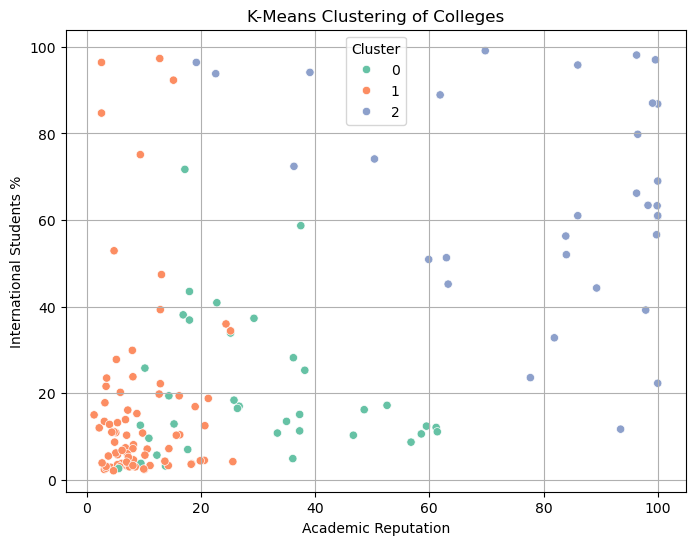

In [64]:
# Step 6: Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cluster_df,
    x='Academic Reputation',
    y='International Students',
    hue='Cluster',
    palette='Set2'
)
plt.title('K-Means Clustering of Colleges')
plt.xlabel('Academic Reputation')
plt.ylabel('International Students %')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

We applied K-Means clustering to categorize colleges based on three factors: Academic Reputation, International Student Percentage, and Sustainability.

The algorithm revealed three distinct groups:

Cluster 2 (Blue): High academic reputation and strong international presence — likely global elite institutions

Cluster 0 (Orange): Low in both metrics — potentially more regional or domestic-focused schools

Cluster 1 (Green): A middle cluster with moderate characteristics